# 2. Mutual Information
A first great step when dealing with many features even without a description is to construct a **feature utility metric** and select the most useful features.

One such metric is **mutual information**. In contrast to correlation, it detects **any** kind of relationship, not just linear ones. It's a great general-purpose metric:
- easy to use and interpret
- computationally efficient
- theoretically well-founded
- resistant to overfitting
- able to detect any kind of relationship

Mutual information describes the reduction of **uncertainty** or **impurity** regarding the target given a feature.

## Interpreting Mutual Information (MI) Scores
MI is at least $0.0$, which indicates independence. There is no upper bound, but in practice values $>2.0$ are uncommon, as it is logarithmic.
- MI helps to understand the **relative potential** of a feature as predictor of the target, considered by itself
- A feature can be very informative when interacting with others, but not so informative all allone. MI can't detect interaction between features, it's a **univariate** metric
- The actual usefullness of a feature depends on the model. We may need to transform the feature first to expose the association, e.g. nonlinear relations for linear models

## Example - 1985 Automobiles
Predict a car's price given 23 of the cars' features. We'll rank the features with MI and visualize the results.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')

df = pd.read_csv("./resources/Automobile_data.csv")
df = df[(df['price'] != '?') & (df['horsepower'] != '?') & (df['fuel-type'] != '?')]
df['price'] = pd.to_numeric(df['price'])
df['horsepower'] = pd.to_numeric(df['horsepower'])
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [2]:
X = df.copy()
y = X.pop("price")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == np.int64

In [3]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[:5]

curb-weight    1.494933
horsepower     1.257421
engine-size    1.004837
highway-mpg    0.938101
city-mpg       0.829949
Name: MI Scores, dtype: float64

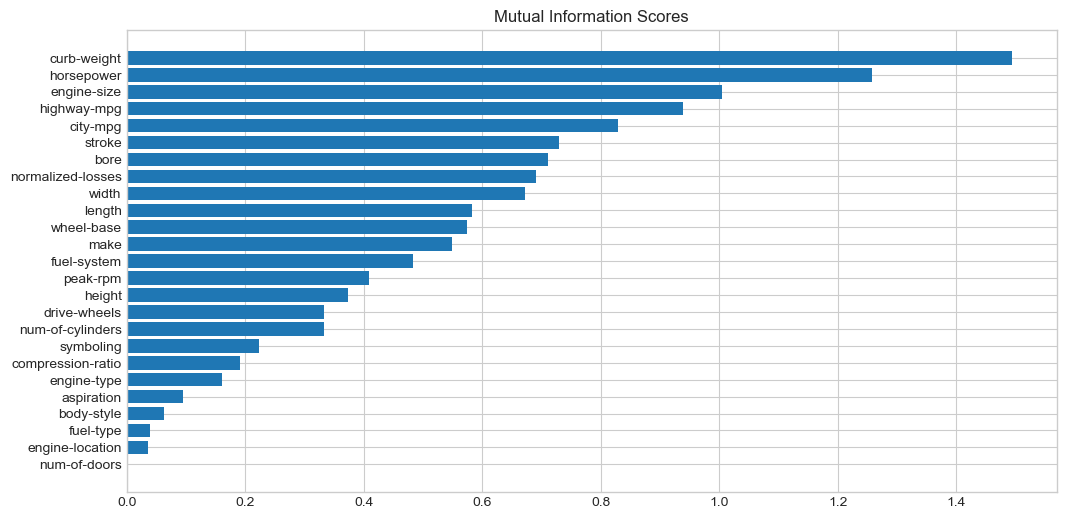

In [4]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(12, 6))
plot_mi_scores(mi_scores)

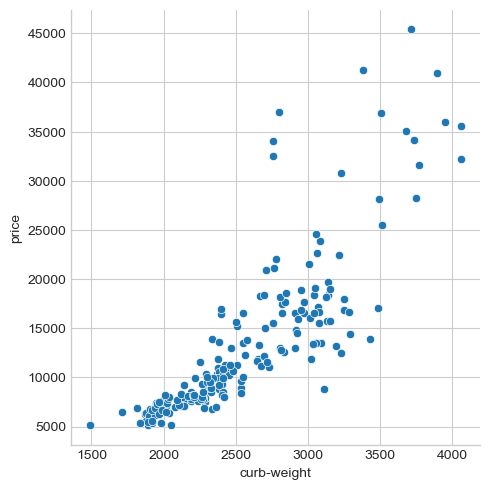

In [5]:
sns.relplot(x="curb-weight", y="price", data=df);

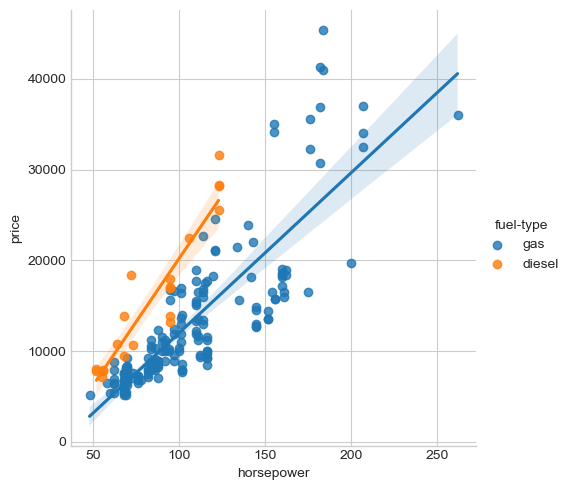

In [6]:
sns.lmplot(x="horsepower", y="price", hue="fuel-type", data=df);

## Exercises